#Kütüphane Yükleme


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Dataset Yükleme ve İnceleme



##Yükleme

In [ ]:
df = pd.read_csv("/content/tips.csv")

##Kontrol etme


In [ ]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("\n##################### Columns #####################")
    print(dataframe.columns)
    print("\n##################### Info #####################")
    dataframe.info()
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    if dataframe.isnull().values.any()=="True":
      print("Eksik değer bulunmakta")
      print(dataframe.isnull().sum())
    else:
      print("Eksik değer bulunmamakta")


In [ ]:
check_df(df)

##################### Shape #####################
(244, 7)

##################### Columns #####################
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
##################### Types #####################
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


# Değişken açıklamaları


*   total_bill= Ödenen hesap
*   tip= Bırakılan bahşiş
*   sex = Cinsiyet
*   smoker = Masada sigara içilip içilmediğinin bilgisini veren değişken
*   day = Gün
*   time = Yenen yemeğin öğlen yemeği mi veya akşam yemeği mi bilgisini veren değişken
*   size = Yemek yiyen kişi sayısı


## Değişkenleri tiplerine göre ayırma.


In [ ]:
df_numerik=df.select_dtypes(include=["float64","int64"])
df_kategorik=df.select_dtypes(include=["object"])

In [ ]:
df_numerik.head()


,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [34]:
df_kategorik.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time'}, axis=1)
              .sort_values('time', ascending=True))
  xs = counted['time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('count()')

#Veri görselleştirmeleri.


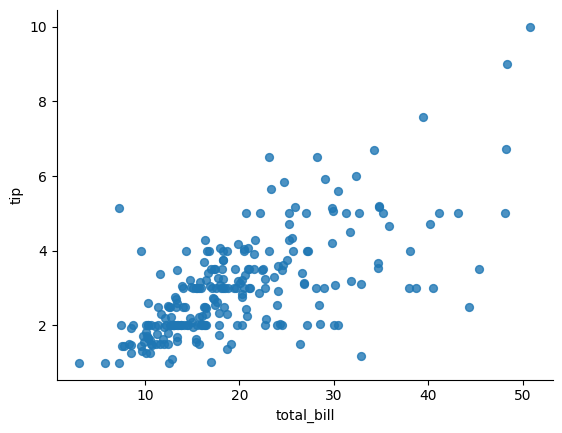

In [ ]:
from matplotlib import pyplot as plt
df_numerik.plot(kind='scatter', x='total_bill', y='tip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

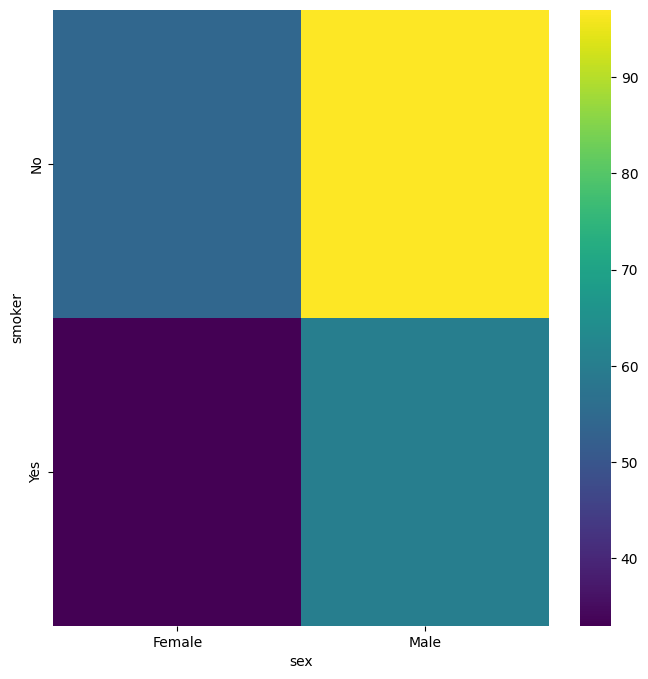

In [37]:
#Sigara içen ve içmeyenlerin cinsiyetlerine göre dağılımını gösteren heatmap grafiği

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['smoker'].value_counts()
    for x_label, grp in df_kategorik.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('smoker')

<Axes: xlabel='day', ylabel='total_bill'>

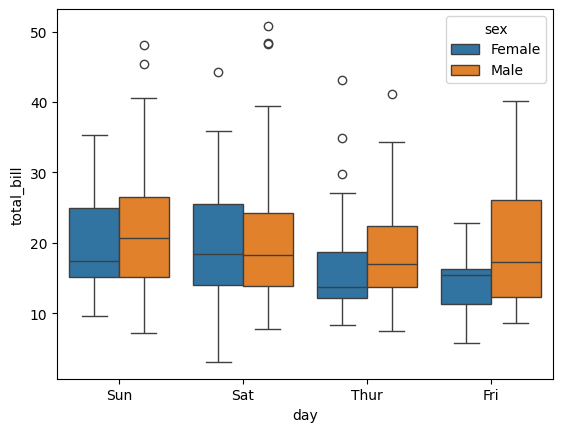

In [55]:
#Hangi gün hangi cinsiyette olanlar daha yüksek ücret ödüyor
sns.boxplot(x="day",y="total_bill",hue="sex",data=df)

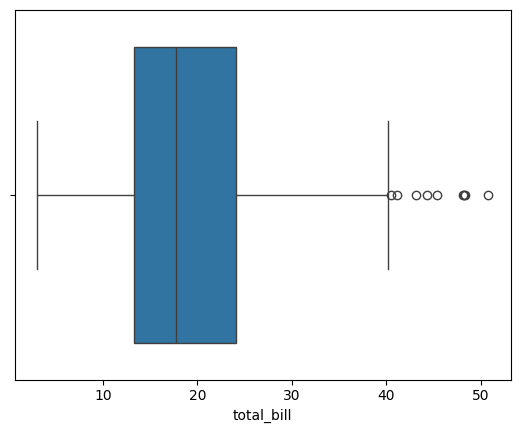

In [39]:
#aykırı değerlerin gözlenmesi için çizilen kutu grafiği
sns.boxplot(x=df["total_bill"]);

In [42]:
#hangi gün daha fazla kazanıldığını gözlemlemek için groupby kullandım.
df.groupby(["day"])["total_bill"].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

<Axes: xlabel='day', ylabel='total_bill'>

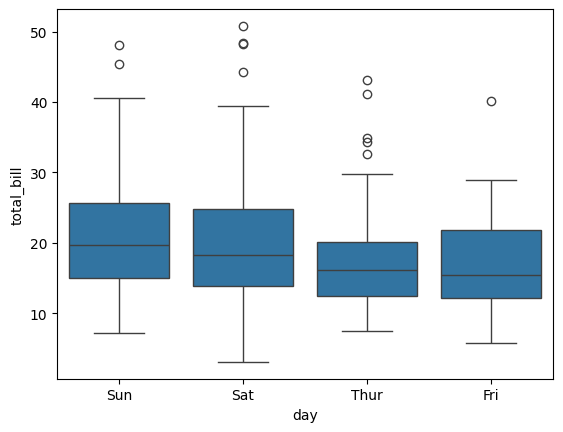

In [41]:
sns.boxplot(x="day",y="total_bill",data=df)


In [57]:
#Öğle yemeği ve akşam yemeği ortalam ücret gösterimi
df.groupby(["time"])["total_bill"].mean()

time
Dinner    20.797159
Lunch     17.168676
Name: total_bill, dtype: float64

<Axes: xlabel='time', ylabel='total_bill'>

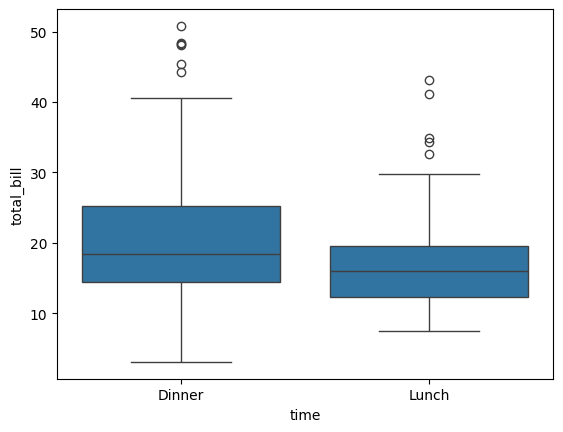

In [58]:
sns.boxplot(x="time",y="total_bill",data=df)

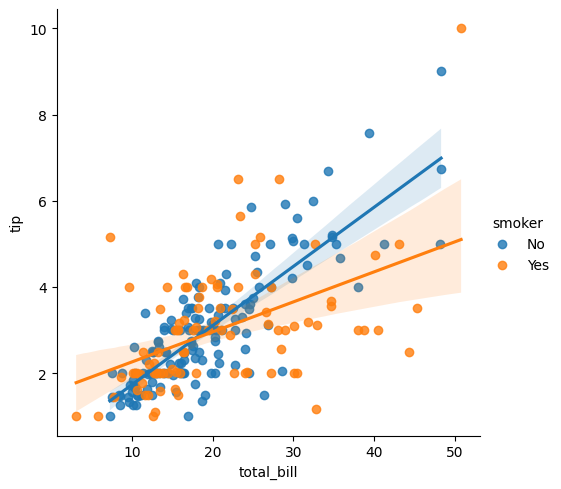

In [60]:
#Sigara içen ve içmeyene göre ödenen ücret ve verilen bahşişi gösteren tablo
sns.lmplot(x="total_bill",y="tip",hue="smoker",data=df)

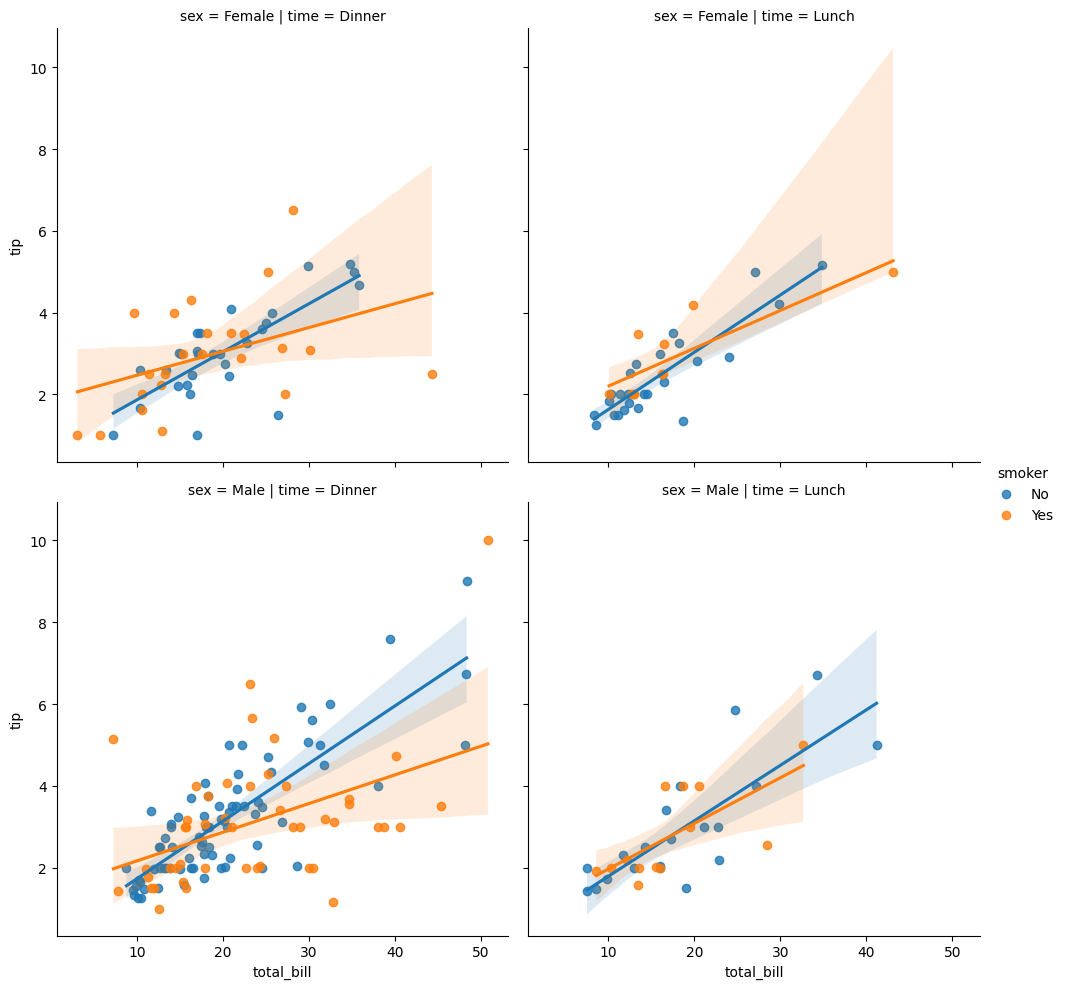

In [61]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",row="sex",data=df)